### Однофакторный дисперсионный анализ<br>(One-way ANOVA)

Очень часто в экспериментах и исследованиях возникает необходимость сравнить несколько групп между собой. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 

Импорт библиотек

In [ ]:
#import libraries
import pandas as pd
import scipy.stats as stats
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns

Импорт файла формата csv для анализа однофакторного дисперсионного анализа

In [ ]:
#import dataset from url
url = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(url, header=None, sep=',')

Просмотр импортированных данных

In [ ]:
# see the imported data
data

,0,1
0,expr,Therapy
1,100,A
2,96,A
3,101,A
4,95,A
...,...,...
56,87,D
57,93,D
58,96,D
59,92,D


Чистим датасет

In [ ]:
#recognize the names of the columns
data.columns

Int64Index([0, 1], dtype='int64')

In [ ]:
#assign the column names by the names of 0 row
data.columns = data.iloc[0]
data

,expr,Therapy
0,expr,Therapy
1,100,A
2,96,A
3,101,A
4,95,A
...,...,...
56,87,D
57,93,D
58,96,D
59,92,D


In [ ]:
#remove 0 index from dataframe
df = data.iloc[pd.RangeIndex(len(data))].drop(0)
df

,expr,Therapy
1,100,A
2,96,A
3,101,A
4,95,A
5,103,A
6,99,A
7,97,A
8,96,A
9,98,A
10,106,A


In [ ]:
#check the column names 
df.columns

Index(['expr', 'Therapy'], dtype='object', name=0)

In [ ]:
#check the size
df.shape

(60, 2)

In [ ]:
df.expr = pd.to_numeric(df['expr'], errors='coerce')

In [ ]:
df.columns

Index(['expr', 'Therapy'], dtype='object', name=0)

###Exploratory Data Analysis (EDA) - Разведочный анализ данных
Визуализация данных и первичный анализ

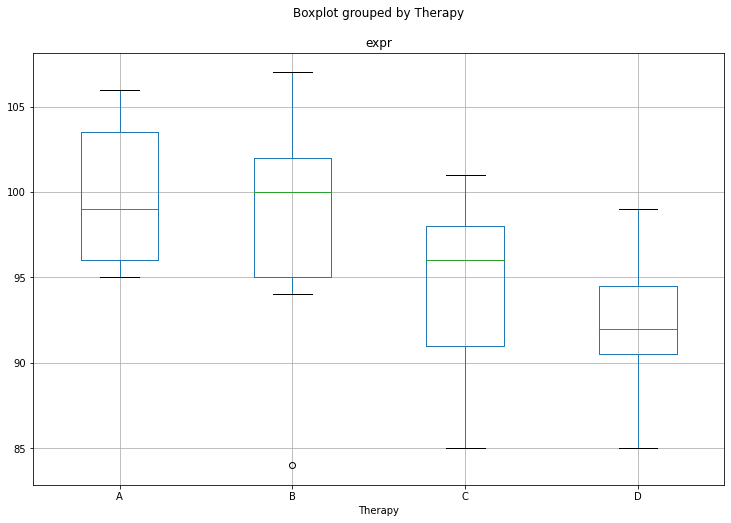

In [ ]:
#boxplot charting with matplotlib tools  
df.boxplot('expr', by='Therapy', figsize=(12,8), grid=True)

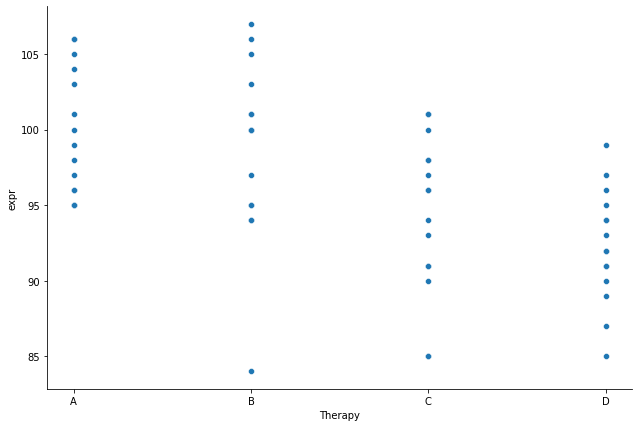

In [ ]:
#pairplot diagram between 4 experimental samples 
sns.pairplot(df, y_vars='expr', x_vars='Therapy', height=6, aspect=1.5)

In [ ]:
from os import stat
A = df[df['Therapy'] == 'A']['expr']
B = df[df['Therapy'] == 'B']['expr']
C = df[df['Therapy'] == 'C']['expr']
D = df[df['Therapy'] == 'D']['expr']
stats.f_oneway(A, B, C, D)

F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)

In [ ]:
#alternative way to find out F and p-value, also df, SSB, SSW, Mean using 
#source https://www.statsmodels.org/devel/generated/statsmodels.stats.anova.anova_lm.html
import statsmodels.api as sm 
from statsmodels.formula.api import ols

expr_lm = ols('expr ~ Therapy', data=df).fit()
table = sm.stats.anova_lm(expr_lm, type=2)
print(table)

            df       sum_sq     mean_sq         F    PR(>F)
Therapy    3.0   560.716667  186.905556  8.037302  0.000152
Residual  56.0  1302.266667   23.254762       NaN       NaN


**Заключение:**  
Нулевая гипотеза о равенстве средних значений всех 4-х групп (A, B, C, D) отклоняется, так как полученный p уровень значимости меньше 5% и равняется приблизительно 0.000152.
Принимается альтернативная гипотеза о том, что средние значения хотя бы в одной паре сравниваемых групп не равны. 

Чем больше критерий Фишера F, тем сильнее фактор влияет на различие групп между собой. 